#Linear Regression from scratch in Python<br>

In this notebook we have implemented a Least Squares solution (finding solution by minimizing sum of squared distances of the points from the halfspace). We have implemented three methods to arrive at the solution that minimize the cost function.

In [1]:
import pandas as pd 
import numpy as np
from random import seed
from random import randint 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Firstly we generate a dataset to work on. Let us take an equation for instance of the form $ax + b = y$ and generate data accordingly. Although it would only be fair for us to add some kind of noise. 
<br>
So the equation we are considering for this notebook is $2x + 3 = y$

In [2]:
a = 2
b = 3 
# ax + b = y
n = 100

In [3]:
data = []
for i in range(n):
  row = []
  x = randint(0,20)
  delta = random.uniform(0, 1)
  x+=delta
  y = a*x + b
  delta = random.uniform(0, 2)
  y = y+delta
  row.append(x)
  row.append(y)
  data.append(row)
# print(data[:-1],data[0:]

In [4]:
df = pd.DataFrame(data)
X = df[0]
Y = df[1]

In [5]:
df.head()

,0,1
0,20.022905,43.481886
1,4.650902,13.881018
2,11.201739,27.048767
3,1.735265,7.831861
4,1.470437,7.324327


Frist;y we shall split our dataset into traina and test sets.

In [6]:
indices = np.arange(len(X))
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, Y, indices, test_size=0.20, random_state=42)

Now before we go on to the next steps, let us briefly visualize our data points.

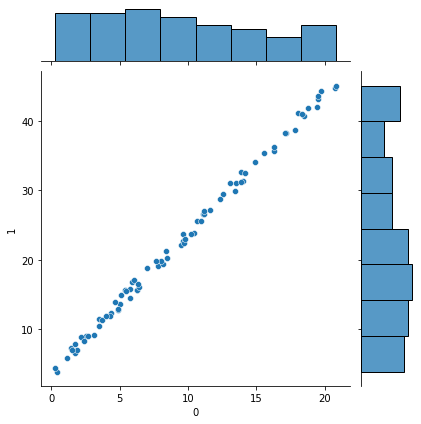

In [7]:
sns.jointplot(x=X_train, y = y_train)

Since we are attempting to solve the problem using the least sqaures solution, our cost function is going to be as follow: $$ f(a,b) = \sum_{i = 1}^{n}(ax_i + b - y_i)^2 $$<br>
$$\implies f(a,b) = \sum_{i = 1}^{n}(y^{\prime}_{i} - y_i)^2$$<br>
where, $y^{\prime}_{i} = ax_i + b$

In [9]:
def computecost(Xt, Yt, ind, ac, bc):
  # m = len(Xt)
  sum = 0
  for i in ind:
    sum+= ac*Xt[i] + bc - Yt[i]
  c = sum*sum
  return c

#Gradient Descent
 We now go into our gradient descent loop where we calculate new values for a,b and also keep track of its cost using the computeCost function that we defined earlier. <br><br>
 Repeat until convergence or max_iter{
1.   Calculate gradients at $a_{i-1}, b_{i-1}$
2.   Update $a_i, b_i$
3.   Compute cost for these new values and keep track of this cost as we go

 }

 <br><br>
 Gradient is calculated as follows: 
 $$\frac{\partial f(a,b)}{\partial a} = 2\sum_{i=1}^n x_i(ax_i + b - y_i)$$ <br>
 $$\frac{\partial f(a,b)}{\partial b} = 2\sum_{i=1}^n(ax_i + b - y_i)$$<br>
 $$ \nabla(f(a,b)) = (\frac{\partial f(a,b)}{\partial a}, \frac{\partial f(a,b)}{\partial b} )$$<br>
 $$\implies\nabla(f(a,b)) = (2\sum_{i=1}^n x_i(ax_i + b - y_i), 2\sum_{i=1}^n(ax_i + b - y_i)) $$
  <br><br>
After computing gradient, we update our values as follows: 
$$a_{i+1} = a_i - \eta\frac{(\frac{\partial f(a,b)}{\partial a})_{(a_i, b_i)}}{||\nabla f(a,b)||_2}$$<br>
$$b_{i+1} = b_i - \eta\frac{(\frac{\partial f(a,b)}{\partial b})_{(a_i, b_i)}}{||\nabla f(a,b)||_2}$$<br>
where $\eta$ is the learning rate
<br><br>
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y^{\prime}_{i} - y_i)^2$$

###Approach 1 : have a certain number of iterations before the process comes to an end

In [10]:
epochs = 1000
agd,bgd = 0,0
# eta = 0.01
eta = [0.1,0.05,0.02, 0.01, 0.001]
norm = 0
J_history_gd = []

In [11]:
def gradient_descent(Xt, Yt, ap, bp,lr, epochs):
  his = []
  for i in range(epochs):
    h = computecost(Xt, Yt, indices_train, ap, bp)
  # print(h)
    his.append(h) 
    slopesum = 0
    biassum = 0 
    for i in indices_train:
      slopesum += Xt[i]*(ap*Xt[i] + bp - Yt[i])
      biassum +=(ap*Xt[i]+bp - Yt[i])
    norm = np.sqrt(slopesum*slopesum + biassum*biassum)
    slopesum = slopesum/norm
    biassum = biassum/norm
    ap = ap - lr*2*(slopesum)
    bp = bp - lr*2*(biassum)
  return ap, bp, his 

Analysing gradient descent with respect to different learn rates by plotting the cost histories.

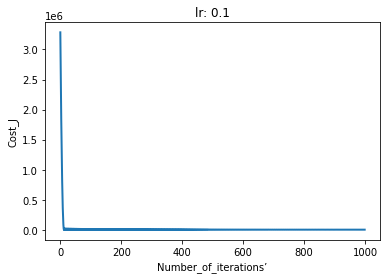

Error on test set:251.7003659772871, a: 2.1105470539305466, b: 3.7942824488065745


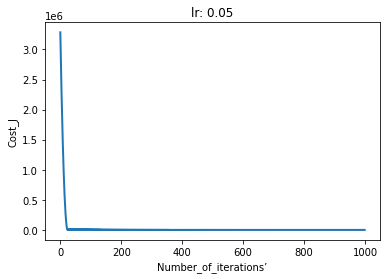

Error on test set:238.17452108079632, a: 1.9601525129025779, b: 3.7813858345143716


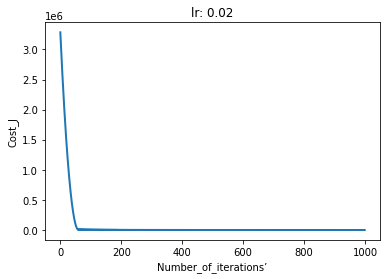

Error on test set:0.919308332654998, a: 2.0305505539485846, b: 3.7786155904373864


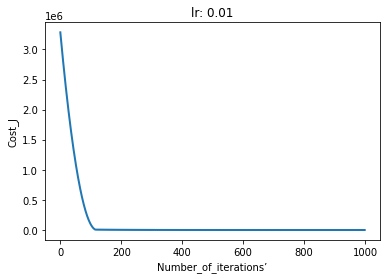

Error on test set:52.3949138434672, a: 2.0017831745511487, b: 3.76150024007119


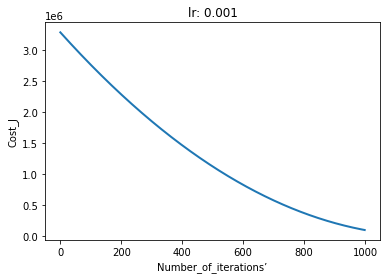

Error on test set:6550.433046659355, a: 1.9926794038321058, b: 0.17063130899824994


In [12]:
for i in range(len(eta)):
  ai, bi, hi = 0, 0 ,0
  ai, bi, hi = gradient_descent(X, Y, agd, bgd, eta[i], epochs)
  plt.plot(np.arange(epochs), hi, LineWidth=2)
  plt.title("lr: {}".format(eta[i]))
  plt.xlabel('Number_of_iterations’')
  plt.ylabel('Cost_J')
  plt.show()
  ci = 0
  ci = computecost(X,Y, indices_test, ai, bi)
  print("Error on test set:{}, a: {}, b: {}".format(ci,ai, bi))

In [13]:
# for i in range(epochs):
#   h = computecost(X, Y, ap, bp)
#   # print(h)
#   J_history.append(h)
#   slopesum = 0
#   biassum = 0 
#   for i in range(len(X)):
#     slopesum += X[i]*(ap*X[i] + bp - Y[i])
#     biassum +=(ap*X[i]+bp - Y[i])
#   norm = np.sqrt(slopesum*slopesum + biassum*biassum)
#   slopesum = slopesum/norm
#   biassum = biassum/norm
#   ap = ap - eta*2*(slopesum)
#   bp = bp - eta*2*(biassum)
#   # print(ap,bp)

### Approach 2 : compare the results from the previous iteration to check for convergence

In [48]:
delta = 0.01
lr = 0.01
ap_history = []
bp_history = []
ap, bp = 0,0
J_history = []

In [52]:
ap_history.append(ap)
bp_history.append(bp)
h = computecost(X, Y,indices_train, ap, bp)
J_history.append(h)
for j in range(1000):
  slopesum = 0
  biassum = 0 
  for i in range(len(X)):
    slopesum += X[i]*(ap*X[i] + bp - Y[i])
    biassum +=(ap*X[i]+bp - Y[i])
  norm = np.sqrt(slopesum*slopesum + biassum*biassum)
  slopesum = slopesum/norm
  biassum = biassum/norm
  ap = ap - lr*2*(slopesum)
  bp = bp - lr*2*(biassum)
  h = computecost(X, Y, indices_train,ap, bp)
  if (ap_history[-1]-delta <= ap <= ap_history[-1]+delta) and (bp_history[-1]-delta <= bp <= bp_history[-1]+delta):
    break
  J_history.append(h)
  ap_history.append(ap)
  bp_history.append(bp)
print(ap,bp,j)

2.0205680590615334 3.54537234065976 999


In [55]:
c = computecost(X, Y, indices_test, ap_history[-1], bp_history[-1])
print("Error on test set: {}, a: {}, b:{}".format(c,ap_history[-1], bp_history[-1]))

Error on test set: 3.1837723796395854, a: 2.0205680590615334, b:3.54537234065976


#Stochastic Gradient Descent


In [58]:
asgd, bsgd = 0,0
lr = 0.015
divideby = 1

In [69]:
def sgd(X, Y, ind, n, k, asgd, bsgd,lr):
  curr = 0
  while curr<n:
    ind = random.sample(ind,k)
    slopesum = 0
    biassum = 0
    for i in range(k):
      slopesum += X[i]*(asgd*X[i] + bsgd - Y[i])
      biassum +=(asgd*X[i]+bsgd - Y[i])
    norm = np.sqrt(slopesum*slopesum + biassum*biassum)
    slopesum = slopesum/norm
    biassum = biassum/norm
    asgd = asgd - lr*2*(slopesum)
    bsgd = bsgd - lr*2*(biassum)
    curr+=1
  return asgd, bsgd

In [70]:
i = set(indices_train)
asg, bsg = sgd(X, Y, i, 1000, 10, asgd,bsgd,lr) 
c = computecost(X, Y, indices_test, asg, bsg)
print("Error on test set :{}, a:{}, b:{}".format(c,asg,bsg))

Error on test set :0.026100831913507132, a:1.9987187741553896, b:4.163122963018664


#Analytical Method
This method is on the lines of a natural solution. We have, in this case, two variables. We also have two partial derivative equations $\frac{\partial f(a,b)}{\partial a}$ and $\frac{\partial f(a,b)}{\partial b}$. Equating both these equations to zero and solving for a and b we will arrive at the following: <br><br>
$$a = \frac{(\sum y)(\sum x^2)- (\sum x)(\sum xy) }{n(\sum x^2) - (\sum x)^2}$$<br>
$$b = \frac{n(\sum xy)- (\sum x)(\sum y) }{n(\sum x^2) - (\sum x)^2}$$

In [56]:
meanx = np.mean(X)
meany = np.mean(Y)
n, d = 0,0 
for i in range(len(X)):
  n+= (X[i] -meanx)*(Y[i]-meany)
  d += pow((X[i] -meanx), 2)
aam = n/d
bam = meany - meanx*aam
print(aam,bam)

2.00917716273673 3.8466353148077417


In [57]:
c = computecost(X, Y, indices_test, aam, bam)
print("Error on test set: {}, a: {}, b:{}".format(c,aam, bam))

Error on test set: 2.7814853326438778, a: 2.00917716273673, b:3.8466353148077417


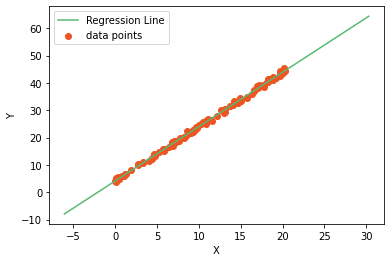

In [18]:
max_x = np.max(X) + 10
min_x = np.min(Y) - 10

# calculating line values x and y
x = np.linspace (min_x, max_x, 100)
y = bam + aam * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='data points')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()